# 3.1 分類アルゴリズムの選択

# 3.2 scikit-learn活用へのファーストステップ

## 3.2.1 scikit-learnを使ったパーセプトロンのトレーニング

In [3]:
from sklearn import datasets
import numpy as np

# Irisデータセットをロード
iris = datasets.load_iris()

# 3, 4列目の特徴量を抽出
X = iris.data[:, [2, 3]]

# クラスラベルを取得
y = iris.target

print("Class labels:", np.unique(y))
# print(x)
# print(y)

Class labels: [0 1 2]


In [4]:
from sklearn.cross_validation import train_test_split

# トレーニングデータとテストデータ二分割
# 全体の30%をテストデータとする
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
#print(y_train)
#print(y_test)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)

# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#print(X_train_std)

In [7]:
from sklearn.linear_model import Perceptron

#  エポック数40, 学習率0.1でパーセプトロンのインスタンスを生成
# n_iter: エポック数（データセットのトレーニング回数）
# eta0: 学習率
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0, shuffle=True)

# トレーニングデータをモデルに適合させる
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [8]:
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
#print(y_test)
#print(y_pred)

# 誤分類のサンプルの個数を表示
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [9]:
from sklearn.metrics import accuracy_score
# 分類の正解率を表示
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を１次元配列に変換して予測を実行
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドんポイントのデータサイズに変換
    z = z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx), 
                   marker=markers[idx], label=cl)
    # テストサンプルを目立たせる（点を○で表示）
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidths=1, marker='o',
                   s=55, label='test set')

結果として得られたグラフからわかるように、3つの品種を線形の決定境界で完全に区切ることができない。

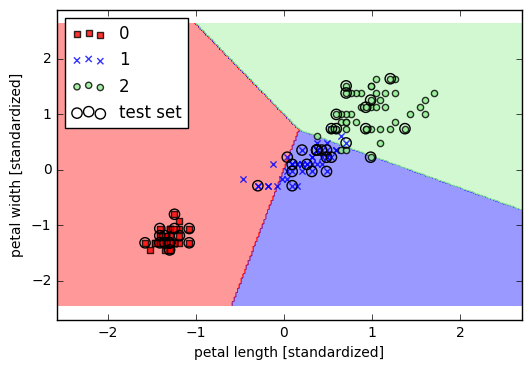

In [11]:
# トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))

# トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))

# 決定境界のプロット
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, 
                      test_idx=range(105, 150))

# 軸のラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.show()

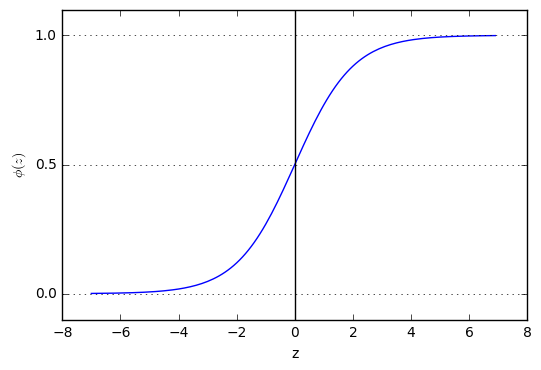

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# シグモイド関数を定義
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# 0.1間隔で-7以上7未満のデータを生成
z = np.arange(-7, 7, 0.1)

# 生成したデータでシグモイド関数を実行
phi_z = sigmoid(z)

# 元データとシグモイド関数の出力をプロット
plt.plot(z, phi_z)

# 垂直線を追加
plt.axvline(0.0, color='k')

# y軸の上限/下限を設定
plt.ylim(-0.1, 1.1)

# 軸のラベルを設定
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y軸の目盛を追加
plt.yticks([0.0, 0.5, 1.0])

# Axesクラスのオブジェクトの取得
ax = plt.gca()

# y軸の目盛に合わせて水平グリッド線を追加
ax.yaxis.grid(True)

# グラフを表示
plt.show()

## 3.3.2 ロジスティック関数の重みの学習

## 3.3.3 scikit-learnによるロジスティック回帰モデルのトレーニング

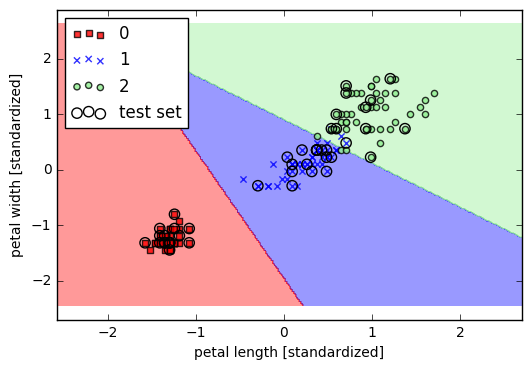

In [14]:
from sklearn.linear_model import LogisticRegression
# ↑このlinear_modelはlinear(リニア)　-> 線形のモデルということ

# ロジスティック回帰のインスタンスを生成
# C: 逆 正則 化 パラメータ C（ 正則 化 パラメータ λ の 逆数）　- 近づきすぎると離れている値に反応しなくなるので、近づいたら離す。
# random_state
lr = LogisticRegression(C=1000.0, random_state=0)

# トレーニングデータをモデルに適合させる
lr.fit(X_train_std, y_train)

# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                     test_idx=range(105, 150))

# 軸ラベルを設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.show()

In [15]:
# lr.predict_proba(X_test_std[0, :])
lr.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

## 3.3.4 正則化による過学習への対処

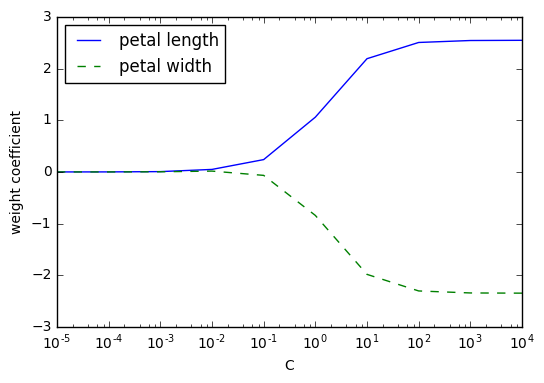

In [16]:
# 空リストを生成（重み係数、逆正則化パラメータ）
weights, params = [], []

# 10個の逆正則化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    
    # 重み係数を格納
    weights.append(lr.coef_[1])
    
    # 逆正則化パラメータを格納
    params.append(10**c)

# 重み係数をNumPy配列に変換
weights = np.array(weights)

# 横軸に逆正則化パラメータ、縦軸に重み係数をプロット
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')

# 横軸を対数スケールに設定
plt.xscale('log')
plt.show()

# 3.4 サポートベクトルマシンによる最大マージン分類

## 3.4.1 最大マージンを直観的に理解する

## 3.4.2 スラック変数を使った非線形分離可能なケースへの対処

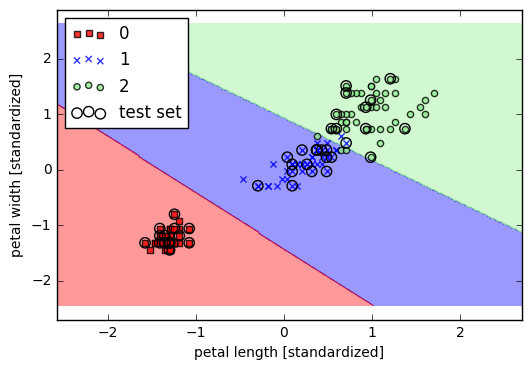

In [18]:
from sklearn.svm import SVC

# 線形SVMのインスタンスを作成
svm = SVC(kernel='linear', C=1.0, random_state=0)

# 線形SVMのモデルにトレーニングデータを適合させる
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105, 150))
# 軸ラベルを設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.show()

## 3.4.3 scikit-learnでの代替実装

In [21]:
from sklearn.linear_model import SGDClassifier

# 確率的勾配降下法バージョンのパーセプトロンを生成
ppn = SGDClassifier(loss='perceptron')

# 確率的勾配降下法バージョンのロジスティック回帰を生成
lr = SGDClassifier(loss='log')

# 確率的勾配降下法バージョンのSVM(損失関数＝ヒンジ関数)を生成
svm = SGDClassifier(loss='hinge')

# 3.5 カーネルSVMを使った非線形問題の求解

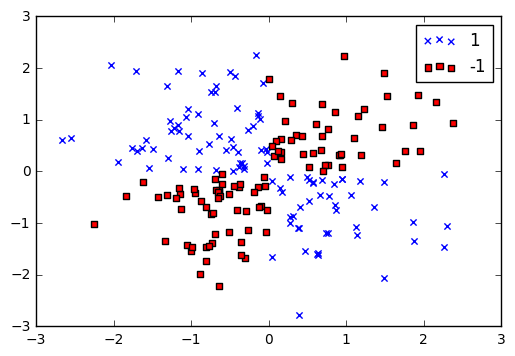

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 乱数種を指定
np.random.seed(0)

# 標準正規分布に従う乱数で200行2列の行列を生成
X_xor = np.random.randn(200, 2)

# 2つの引数に対して排他的論理和を実行
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[: , 1] > 0)

# 排他的論理和の値が真の場合は1, 偽の場合は-1を割り当てる
y_xor = np.where(y_xor, 1, -1)

# ラベル1を青のxでプロット
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
           c='b', marker='x', label='1')

# ラベル-1を赤の四角でプロット
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
           c='r', marker='s', label='-1')

# 軸の範囲を設定
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

## 3.5.1 カーネルトリックを使って分離超平面を高次元空間で特定する

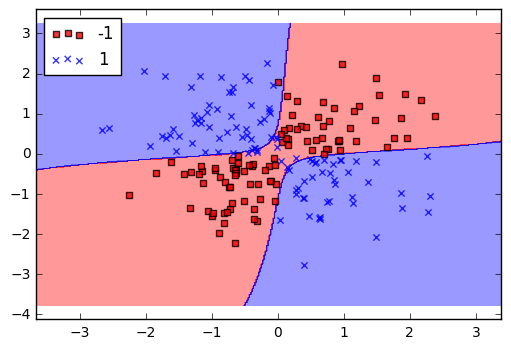

In [23]:
# RBFカーネルによるSVMのインスタンスを生成
svm = SVC(kernel='rbf', random_state=0,
         gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

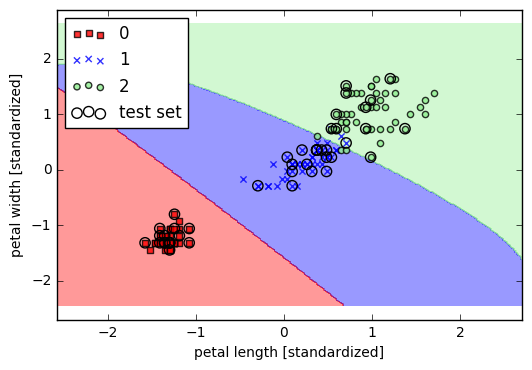

In [24]:
# RBFカーネルによるSVMのインスタンスを生成（２つのパラメータを変更）
svm = SVC(kernel='rbf', random_state=0,
         gamma=0.2, C=1.0)

svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105, 150))
# 軸ラベルを設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.show()

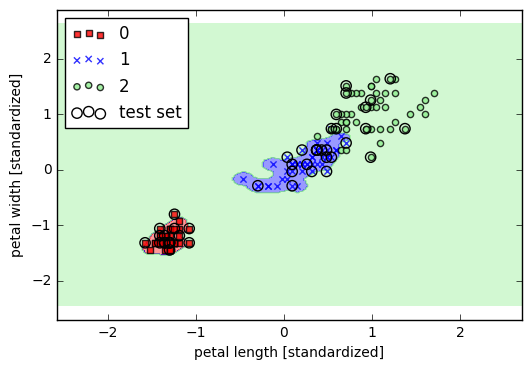

In [25]:
# RBFカーネルによるSVMのインスタンスを生成（γパラメータを変更）
svm = SVC(kernel='rbf', random_state=0,
         gamma=100.0, C=1.0)

svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105, 150))
# 軸ラベルを設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.show()

# 3.6 決定木学習
## 3.6.1 情報利得の最大化：できるだけ高い効果を得る

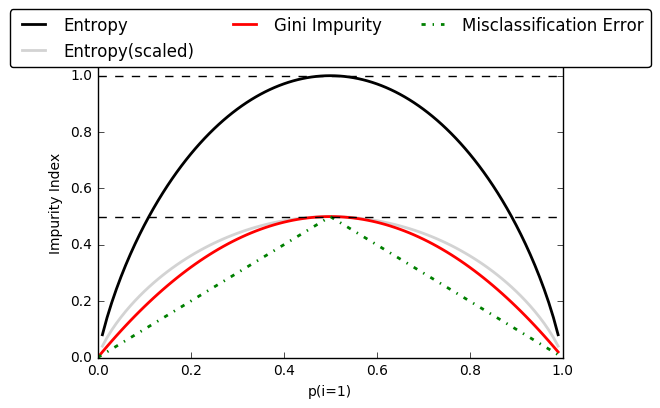

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# ジニ不純度の巻数を定義
def gini(p):
    return (p)*(1-(p)) + (1 - p)*(1 - (1 - p))

# エントロピーの巻数を定義
def entropy(p):
    return - p*np.log2(p) - (1-p)* np.log2((1-p))

# 分類誤差の関数を定義
def error(p):
    return 1 - np.max([p, 1 - p])

# 確率を表す配列を生成（0から0.99まで0.01刻み）
x = np.arange(0.0, 1.0, 0.01)

# 配列の値を元にエントロピー、分類誤差を計算
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

# 図の作成を開始
fig = plt.figure()
ax = plt.subplot(111)

# エントロピー（２種）、ジニ不純度、分類誤差のそれぞれをループ処理
for i , lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy(scaled)',
                          'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '-', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
# 凡例の設定（中央の上に配置）
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
         ncol=3, fancybox=True, shadow=False)

# 2本の水平の破線を引く
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

# 横軸の上限/下限を設定
plt.ylim([0, 1.1])

plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

## 3.6.2 決定木の構築

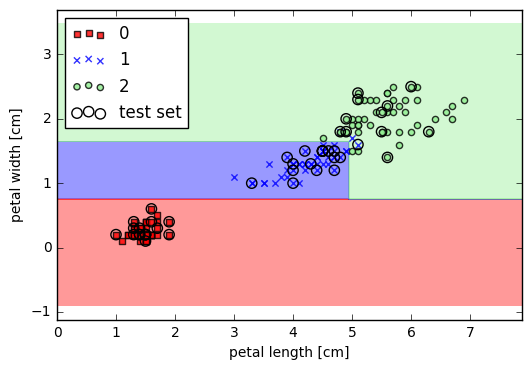

In [28]:
from sklearn.tree import DecisionTreeClassifier

# エントロピーを指標とする決定木のインスタンスを生成
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# 決定木のモデルにトレーニングデータを適合させる
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined, y=y_combined, classifier=tree, 
                      test_idx=range(105, 150))

# 軸のラベルの設定
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.show()

In [29]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
               feature_names=['petal length', 'petal width'])

## 3.6.3 ランダムフォレストを使って弱い学習アルゴリズムと強い学習アルゴリズムを結合する

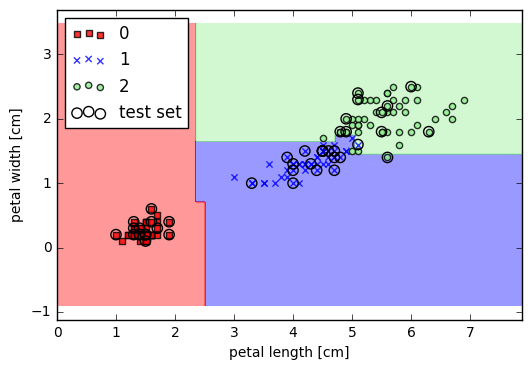

In [30]:
from sklearn.ensemble import RandomForestClassifier

# エントロピーを指標とするランダムフォレストのインスタンスを生成
forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=10, random_state=1, n_jobs=2)

# ランダムフォレストのモデルにトレーニングデータを適合させる
forest.fit(X_train, y_train)
plot_decision_regions(X=X_combined, y=y_combined, classifier=forest, 
                      test_idx=range(105, 150))

# 軸のラベルの設定
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.show()

# 3.7 k近傍法：怠惰学習アルゴリズム

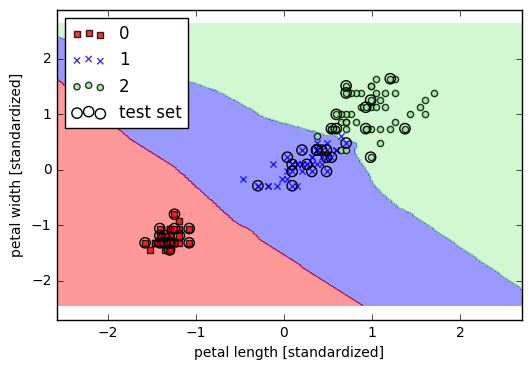

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# k近傍法のインスタンスを生成
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

# k近傍法のモデルにトレーニングデータを適合させる
plot_decision_regions(X_combined_std, y_combined, classifier=knn, 
                      test_idx=range(105, 150))

# 軸のラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

# 凡例の設定（左上に配置）
plt.legend(loc='upper left')

# グラフを表示
plt.show()